In [1]:
lyamda = 2
mu = 1/4
h = 0.001 #шаг
r = lyamda / mu

def factorial(x):
    f = 1;
    i = 1;
    while i <= x:
        f *= i;
        i += 1;
    return f;

print("По формулам Эрланга:");
n = 3; #число каналов
k = n + 1; #число каналов +1
q = 4 #длина очереди
l_q = q + 1 #длина очереди + 1
r = lyamda / mu;
sum1 = 0
sum2 = 0
sum3 = 0.0
for i in range (k):
    sum1 += pow(r, i) / factorial(i);
for i in range (1, l_q):
    sum2 += pow(r / n, i);
p0_e = 1 / (sum1 + sum2 * pow(r, n) / factorial(n));
for i in range (k):
    print("P", i," = {:.4}".format(pow(r,i) / factorial(i) * p0_e), sep = '');
    sum3 += pow(r,i) / factorial(i) * p0_e
i = k;
while i < (k + q):
    print("P", i," = {:.4}".format(pow(r,i) / (pow(n, i - n) * factorial(n)) * p0_e), sep = '');
    sum3 += pow(r,i) / (pow(n, i - n) * factorial(n)) * p0_e
    i += 1;
print("Сумма вероятностей", sum3)

По формулам Эрланга:
P0 = 0.0001451
P1 = 0.00116
P2 = 0.004642
P3 = 0.01238
P4 = 0.03301
P5 = 0.08802
P6 = 0.2347
P7 = 0.6259
Сумма вероятностей 1.0


In [2]:
import matplotlib.pyplot as plt #Библиотека для рисования графиков

#import openpyxl
# создаем новый excel-файл
#wb = openpyxl.Workbook()
# добавляем новый лист
#wb.create_sheet(title = 'Первый лист', index = 0)
# получаем лист, с которым будем работать
#sheet = wb['Первый лист']

# Метод Эйлера
p0 = 1
p1 = 0;
p2 = 0
p3 = 0
p4 = 0
p5 = 0
p6 = 0
p7 = 0
t = 0
eps = 0.000001
#Массивы для графиков
p0_res = []
p1_res = []
p2_res = []
p3_res = []
p4_res = []
p5_res = []
p6_res = []
p7_res = []
k = 100000
i = 0
t_res = []
p_q = [] # pow(r, n + 1) / (factorial(n) * (n - r/n)) * p0
p_otk = [] #pow(r,(n + q)) / (pow(n, q) * factorial(n)) * p0
p_b = [] # pow(r, n) / ((n - r/n) * factorial(n - 1)) * p0
Q = [] #1 - p_otk
A = [] #lyamda * Q
L_q = [] #p4 + 2 * p5 + 3 * p6
L_s = [] #A / mu
L = [] #L_s + L_q
L_f = [] #p0 * (pow(r, 1) / factorial(n - 1) + \
          #  2 * pow(r, 2) / factorial(n - 2)\
           # + 3*  pow(r, 3) / factorial(n - 3))
L_b = [] #n - L_f
T_w = [] #p0 * pow(r, n) / (mu * factorial(n - 1) * pow(n - r/n, 2))
T_t = [] #p0 * pow(r, n + 1) / (factorial(n - 1) * pow(n - r/ n, 2))
T_m = [] #T_w + 1 / mu
T_t_m = [] #T_t + r


#цикл на n - итераций
while(True):
    i += 1
    t_res.append(t * 60)
    t += h;
    p0_res.append(p0)
    p1_res.append(p1)
    p2_res.append(p2)
    p3_res.append(p3)
    p4_res.append(p4)
    p5_res.append(p5)
    p6_res.append(p6)
    p7_res.append(p7)
    
    #вероятность возникновения очереди
    p_q_calc = pow(r, n + 1) / (factorial(n) * (n - r/n)) * p0;  p_q.append(p_q_calc)
    
    #вероятность отказа
    potk = pow(r,(n + q)) / (pow(n, q) * factorial(n)) * p0;     p_otk.append(potk)
    
    #вероятность того, что все узлы заняты
    p_b_calc = pow(r, n) / ((n - r/n) * factorial(n - 1)) * p0;  p_b.append(p_b_calc)
    
    #относительная пропускная способность
    Q_calc = 1 - potk;                                           Q.append(Q_calc)
    
    #абсолютная пропускная способность
    A_calc = lyamda * Q_calc;                                    A.append(A_calc)
    
    #Средняя длина очереди
    L_q_calc = p4 + 2 * p5 + 3 * p6;                             L_q.append(L_q_calc)
    
    #Среднее число обслуживаемых заявок
    L_s_calc = A_calc / mu;                                      L_s.append(L_s_calc)
    
    #общее количество заявок в системе
    L_calc = L_s_calc + L_q_calc;                                L.append(L_calc)
    
    #среднее число свободных узлов
    L_f_calc = p0 * (pow(r, 1) / factorial(n - 1) + \
            2 * pow(r, 2) / factorial(n - 2)\
            + 3*  pow(r, 3) / factorial(n - 3));                 L_f.append(L_f_calc)
    
    #среднее число занятых узлов
    L_b_calc = n - L_f_calc;                                     L_b.append(L_b_calc)
    
    #среднее время ожидания обслуживания
    T_w_calc = p0 * pow(r, n) \
        / (mu * factorial(n - 1) * pow(n - r/n, 2));             T_w.append(T_w_calc)
    
    #общее время, проведенное заявками в очереди, поступившие за единицу времени
    T_t_calc = p0 * pow(r, n + 1)\
        / (factorial(n - 1) * pow(n - r/ n, 2));                 T_t.append(T_t_calc)
    
    #среднее время, проведенное заявками в системе
    T_m_calc = T_w_calc + 1 / mu;                                T_m.append(T_m_calc)
    
    #среднее время, проведенное заявками в системе, поступившие за единицу времени
    T_t_m_calc = T_t_calc + r / n;                                   T_t_m.append(T_t_m_calc)
    

    
    #Расчет решение системы дифференциальных уравнений
    p0_next = p0 + h * (-lyamda * p0 + mu * p1);
    p1_next = p1 + h * (lyamda * p0 - (lyamda + mu) * p1 + 2 * mu * p2);
    p2_next = p2 + h * (lyamda * p1 - (lyamda + 2 * mu) * p2 + 3 * mu * p3);
    p3_next = p3 + h * (lyamda * p2 - (lyamda + 3 * mu) * p3 + 3 * mu * p4); 
    p4_next = p4 + h * (lyamda * p3 - (lyamda + 3 * mu) * p4 + 3 * mu * p5);
    p5_next = p5 + h * (lyamda * p4 - (lyamda + 3 * mu) * p5 + 3 * mu * p6);
    p6_next = p6 + h * (lyamda * p5 - (lyamda + 3 * mu) * p6 + 3 * mu * p7);
    p7_next = p7 + h * (lyamda * p6 - 3 * mu * p7);
    p0 = p0_next;
    p1 = p1_next;
    p2 = p2_next;
    p3 = p3_next; 
    p4 = p4_next;
    p5 = p5_next;
    p6 = p6_next;
    p7 = p7_next;
    sum = p0 + p1 + p2 + p3 + p4 + p5 + p6 + p7
    if(sum < 1 - eps) or (sum > 1 + eps) or (i > k):
        break



F:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


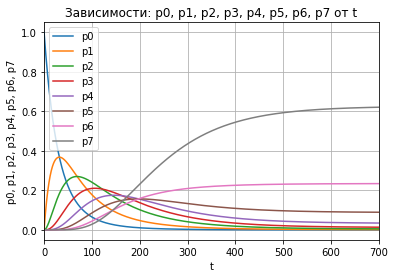

In [3]:
# Построение графика
plt.title("Зависимости: p0, p1, p2, p3, p4, p5, p6, p7 от t") # заголовок
plt.xlabel("t")         # ось абсцисс
plt.ylabel("p0, p1, p2, p3, p4, p5, p6, p7")    # ось ординат
plt.grid()              # включение отображение сетки

plt.plot(t_res, p0_res, label = "p0")# построение графика
plt.plot(t_res, p1_res, label = "p1")# построение графика
plt.plot(t_res, p2_res, label = "p2")# построение графика
plt.plot(t_res, p3_res, label = "p3")# построение графика
plt.plot(t_res, p4_res, label = "p4")# построение графика
plt.plot(t_res, p5_res, label = "p5")# построение графика
plt.plot(t_res, p6_res, label = "p6")# построение графика
plt.plot(t_res, p7_res, label = "p7")# построение графика
plt.legend() #добавим легенду
plt.xlim(0, 700)  #ограничим ось абсцисс
plt.show() #показ графика




F:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


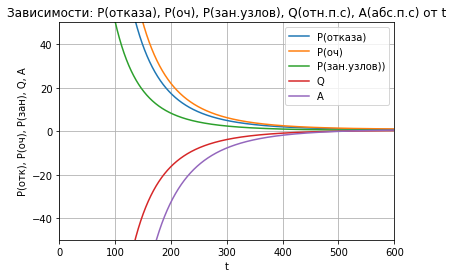

In [158]:
# Построение графика
plt.title("Зависимости: P(отказа), P(оч), P(зан.узлов), Q(отн.п.с), А(абс.п.с) от t") # заголовок
plt.xlabel("t")         # ось абсцисс
plt.ylabel("P(отк), P(оч), P(зан), Q, А")    # ось ординат
plt.grid()              # включение отображение сетки

plt.plot(t_res, p_otk, label = "P(отказа)")# построение графика
plt.plot(t_res, p_q, label = "P(оч)")# построение графика
plt.plot(t_res, p_b, label = "P(зан.узлов))")# построение графика
plt.plot(t_res, Q, label = "Q")# построение графика
plt.plot(t_res, A, label = "A")# построение графика
plt.legend() #добавим легенду
plt.xlim(0, 600)  #ограничим ось абсцисс
plt.ylim(-50, 50)
plt.show() #показ графика

F:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


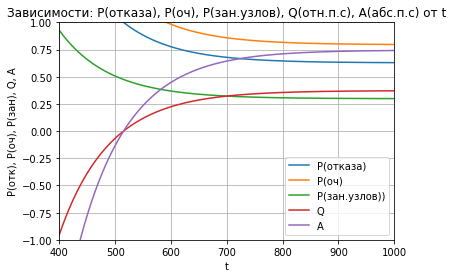

In [168]:

# Построение графика
plt.title("Зависимости: P(отказа), P(оч), P(зан.узлов), Q(отн.п.с), А(абс.п.с) от t") # заголовок
plt.xlabel("t")         # ось абсцисс
plt.ylabel("P(отк), P(оч), P(зан), Q, А")    # ось ординат
plt.grid()              # включение отображение сетки

plt.plot(t_res, p_otk, label = "P(отказа)")# построение графика
plt.plot(t_res, p_q, label = "P(оч)")# построение графика
plt.plot(t_res, p_b, label = "P(зан.узлов))")# построение графика
plt.plot(t_res, Q, label = "Q")# построение графика
plt.plot(t_res, A, label = "A")# построение графика
plt.legend() #добавим легенду
plt.xlim(400, 1000)  #ограничим ось абсцисс
plt.ylim(-1, 1)
plt.show() #показ графика


F:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


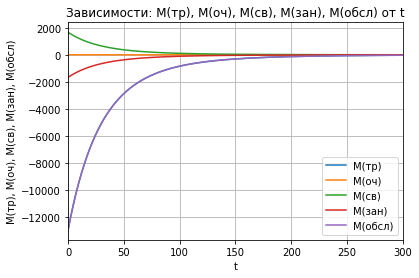

In [160]:

# Построение графика
plt.title("Зависимости: M(тр), M(оч), M(св), М(зан), M(обсл) от t") # заголовок
plt.xlabel("t")         # ось абсцисс
plt.ylabel("M(тр), M(оч), M(св), М(зан), M(обсл)")    # ось ординат
plt.grid()              # включение отображение сетки

#plt.plot(t_res, p_res, label = "P")# построение графика
plt.plot(t_res, L, label = "M(тр)")# построение графика
plt.plot(t_res, L_q, label = "M(оч)")# построение графика
plt.plot(t_res, L_f, label = "M(св)")# построение графика
plt.plot(t_res, L_b, label = "M(зан)")# построение графика
plt.plot(t_res, L_s, label = "M(обсл)")# построение графика
plt.legend() #добавим легенду
plt.xlim(0, 300)  #ограничим ось абсцисс
#plt.ylim(-10, 10)
plt.show() #показ графика



F:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


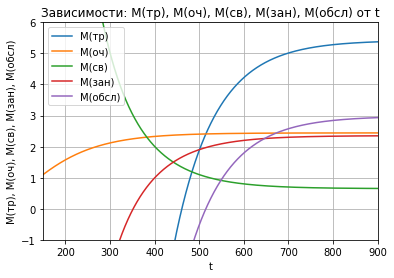

In [161]:
# Построение графика
plt.title("Зависимости: M(тр), M(оч), M(св), М(зан), M(обсл) от t") # заголовок
plt.xlabel("t")         # ось абсцисс
plt.ylabel("M(тр), M(оч), M(св), М(зан), M(обсл)")    # ось ординат
plt.grid()              # включение отображение сетки

#plt.plot(t_res, p_res, label = "P")# построение графика
plt.plot(t_res, L, label = "M(тр)")# построение графика
plt.plot(t_res, L_q, label = "M(оч)")# построение графика
plt.plot(t_res, L_f, label = "M(св)")# построение графика
plt.plot(t_res, L_b, label = "M(зан)")# построение графика
plt.plot(t_res, L_s, label = "M(обсл)")# построение графика
plt.legend() #добавим легенду
plt.xlim(150, 900)  #ограничим ось абсцисс
plt.ylim(-1, 6)
plt.show() #показ графика

F:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


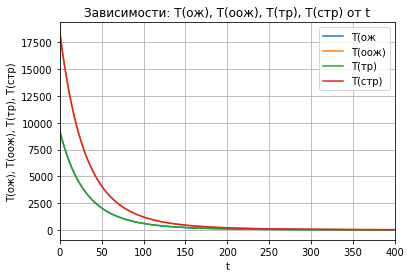

In [162]:

# Построение графика
plt.title("Зависимости: T(ож), T(оож), Т(тр), Т(стр) от t") # заголовок
plt.xlabel("t")         # ось абсцисс
plt.ylabel("T(ож), T(оож), Т(тр), Т(стр)")    # ось ординат
plt.grid()              # включение отображение сетки

#plt.plot(t_res, p_res, label = "P")# построение графика
plt.plot(t_res, T_w, label = "T(ож")# построение графика
plt.plot(t_res, T_t, label = "T(оож)")# построение графика
plt.plot(t_res, T_m, label = "Т(тр)")# построение графика
plt.plot(t_res, T_t_m, label = "Т(стр)")# построение графика
plt.legend() #добавим легенду
plt.xlim(0, 400)  #ограничим ось абсцисс
plt.show() #показ графика


F:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


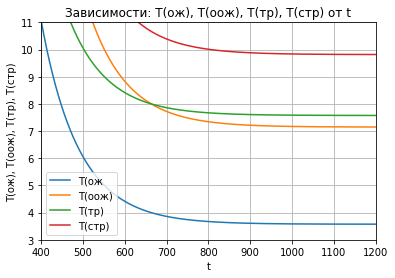

In [163]:
# Построение графика
plt.title("Зависимости: T(ож), T(оож), Т(тр), Т(стр) от t") # заголовок
plt.xlabel("t")         # ось абсцисс
plt.ylabel("T(ож), T(оож), Т(тр), Т(стр)")    # ось ординат
plt.grid()              # включение отображение сетки

#plt.plot(t_res, p_res, label = "P")# построение графика
plt.plot(t_res, T_w, label = "T(ож")# построение графика
plt.plot(t_res, T_t, label = "T(оож)")# построение графика
plt.plot(t_res, T_m, label = "Т(тр)")# построение графика
plt.plot(t_res, T_t_m, label = "Т(стр)")# построение графика
plt.legend() #добавим легенду
plt.xlim(400, 1200)  #ограничим ось абсцисс
plt.ylim(3, 11)
plt.show() #показ графика

In [5]:

print("Численное интегрирование методом Эйлера:")
print("P0 = {:.5f}\nP1 = {:.5f}\nP2 = {:.5f}\nP3 = {:.5f}\nP4 = {:.5f}\nP5 = {:.5f}\nP6 = {:.5f}\nP7 = {:.5f}"\
      .format(p0, p1, p2, p3, p4, p5, p6, p7))
print("Сумма вероятностей состояний = %.2f" % sum)

Численное интегрирование методом Эйлера:
P0 = 0.00015
P1 = 0.00116
P2 = 0.00464
P3 = 0.01238
P4 = 0.03301
P5 = 0.08802
P6 = 0.23472
P7 = 0.62592
Сумма вероятностей состояний = 1.00


In [165]:
p_q = pow(r, n + 1) / (factorial(n) * (n - r/n)) * p0
print("Вероятность наличия очереди = %.3lf" % p_q)
p_otk = pow(r,(n + q)) / (pow(n, q) * factorial(n)) * p0
print("Вероятность отказа = P(6) = %.3lf" % p_otk)
p_b = p_q + p3
print("Вероятность занятости всех узлов = %.3lf" % p_b)
Q = 1 - p_otk
print("Относитльеная пропускная способность = %.3lf" % Q)
A = lyamda * Q
print("Абсолютная пропускная способность = %.3lf" % A)
L_q = p4 + 2 * p5 + 3 * p6
print("Среднее число заявок в очереди = %.3lf" % L_q)
L_s = A / mu
print("Среднее число обслуживаемых заявок = %.3lf" % L_s)
L = L_s + L_q
print("Среднее число заявок в системе = %.3lf" % L)
L_f = p0 * (pow(r, 1) / factorial(n - 1) + \
            2 * pow(r, 2) / factorial(n - 2)\
            + 3*  pow(r, 3) / factorial(n - 3))
print("Среднее число свободных каналов = %.3lf" % L_f)
L_b = n - L_f
print("Среднее число занятых каналов = %.3lf" % L_b)
T_w = p0 * pow(r, n) / (mu * factorial(n - 1) * pow(n - r/n, 2))
print("Среднее время ожидания начала обслуживания = %.3lf" % T_w)
T_t = p0 * pow(r, n + 1) / (factorial(n - 1) * pow(n - r/ n, 2))
print("Общее время, которое проводят в очереди все требования, поступившие в систему за единицу времени = %.3lf" % T_t)
T_m = T_w + 1 / mu
print("Среднее время нахождения заявки в системе = %.3lf" % T_m)
T_t_m = T_t + r /n
print("Среднее время, которое проводят в очереди все требования, поступившие в систему за единицу времени = %.3lf" % T_t_m)


Вероятность наличия очереди = 0.794
Вероятность отказа = P(6) = 0.627
Вероятность занятости всех узлов = 0.827
Относитльеная пропускная способность = 0.373
Абсолютная пропускная способность = 0.745
Среднее число заявок в очереди = 2.441
Среднее число обслуживаемых заявок = 2.980
Среднее число заявок в системе = 5.421
Среднее число свободных каналов = 0.647
Среднее число занятых каналов = 2.353
Среднее время ожидания начала обслуживания = 3.574
Общее время, которое проводят в очереди все требования, поступившие в систему за единицу времени = 7.147
Среднее время нахождения заявки в системе = 7.574
Среднее время, которое проводят в очереди все требования, поступившие в систему за единицу времени = 9.814
